# Assignment 4: Local Features and Image Matching
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm trích xuất đặc trưng ảnh cơ bản, sau đó ứng dụng cho các bài toán tạo ảnh panorama và bài toán đối sánh để tìm kiếm ảnh.
- Harris Corner
- Histogram of Oriented Gradients (HOG)
- Difference of Gaussians (DoG)
- Scale-Invariant Feature Transform (SIFT)

Yêu cầu thư viện: OpenCV 3.4.2.17 , matplotlib, skimage, opencv-contrib-python 3.4.2.17

In [1]:
from IPython.display import Image
from skimage.feature import hog

import skimage
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import imutils

## I. Harris Corner Detector
Harris Corner là một phương pháp phát hiện các điểm (có tính chất) góc trong ảnh, thường được sử dụng khi tính toán các đặc trưng ảnh cho các bài toán thị giác máy tính.


Thư viện OpenCV cung cấp hàm cv2.cornerHarris() để phát hiện các điểm góc trong ảnh. Tham số như sau:
- img - Ảnh đầu vào, phải ở dạng grayscale và float32
- blockSize - It is the size of neighbourhood considered for corner detection
- ksize - Aperture parameter of Sobel derivative used.
- k - Harris detector free parameter in the equation.

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html


Ta có hàm detect_corner(), với các tham số sau:

Input:
- image_path: Đường dẫn file ảnh
- blockSize, ksize, k: tham số của hàm cv2.cornerHarris()
- threshold: ngưỡng để coi 1 điểm là góc

Output:
- Đường dẫn tới file ảnh đầu ra

In [29]:
def detect_corner(image_path, blockSize=2, ksize=3, k=0.04, threshold=0.01):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,blockSize,ksize,k)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>threshold*dst.max()]=[0,0,255]
    out_path = 'corner_' +  f'{blockSize}-{ksize}-{k}-{thresh}' + image_path
    cv2.imwrite(out_path, img)
    return out_path

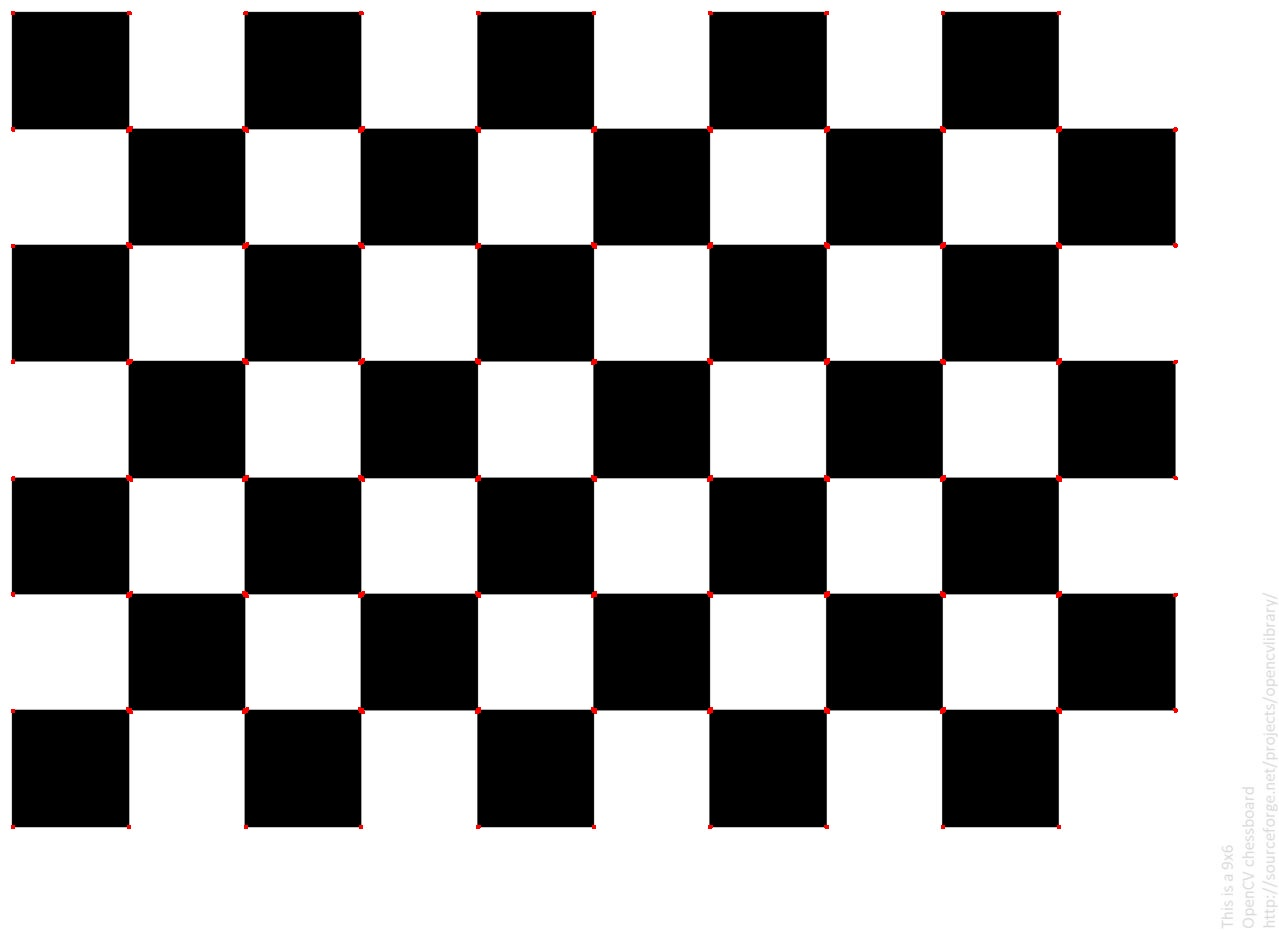

In [30]:
out_path = detect_corner('chessboard.jpg')
Image(out_path)

Hãy thử tùy chỉnh tham số của hàm detect_corner() với ảnh 'house.jpg' và 'sudoku.png' sau sao cho ảnh đầu ra phát hiện được nhiều góc chính xác nhất.

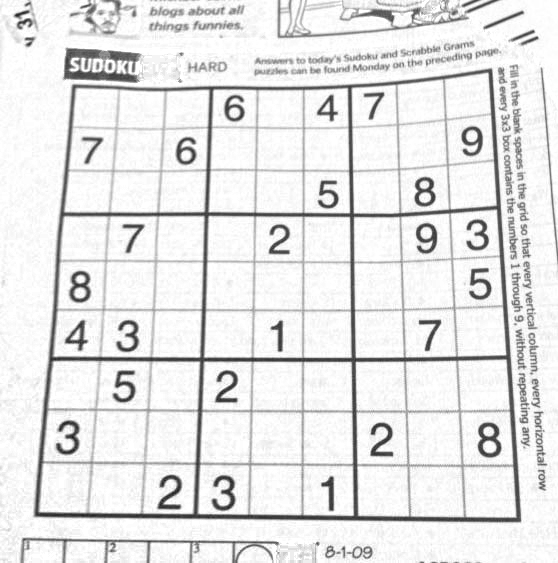

In [5]:
Image('sudoku.png')

In [27]:
import os
os.mkdir('s')

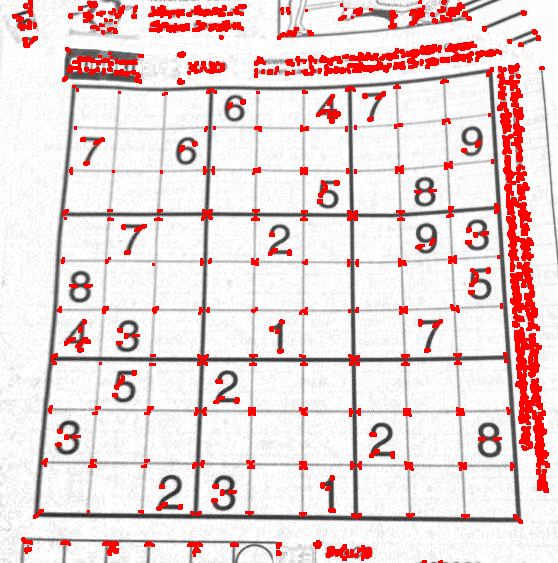

In [31]:
### YOUR CODE HERE ###
out_path = detect_corner('sudoku.png', 4, 3, 0.16, 0.01)

### YOUR CODE HERE ###
Image(out_path)

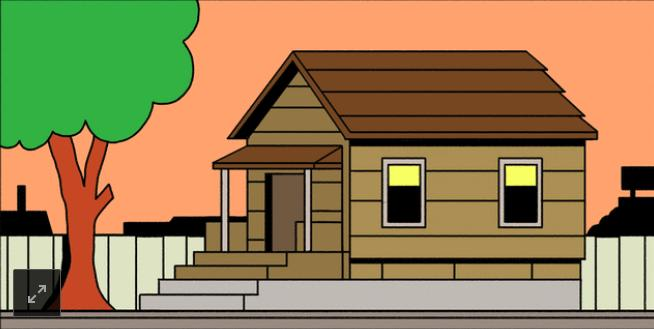

In [7]:
Image('house.jpg')

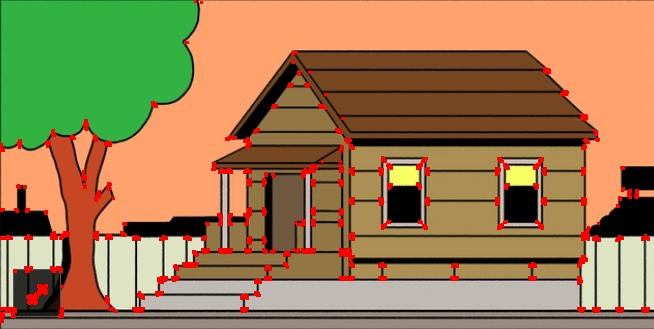

In [8]:
out_path = detect_corner('house.jpg', blockSize=2, ksize=5, k=0.04, threshold=0.005)
Image(out_path)

## II. Histogram of Oriented Gradients (HOG)
Histogram of Oriented Gradients (HOG) là bộ mô tả đặc trưng thường được sử dụng trong thị giác máy tính và xử lí ảnh để biểu diễn đối tượng trong ảnh

Thư viện scikit-image (skimage) cung cấp hàm skimage.feature.hog() để trích chọn đặc trưng HOG. Một số tham số quan trọng của hàm như sau:
- orientations: Number of orientation bins.
- pixels_per_cell: Size (in pixels) of a cell.
- cells_per_block: Number of cells in each block.

Xem đầy đủ tại: http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog

Tutorial chi tiết về HOG: https://www.learnopencv.com/histogram-of-oriented-gradients/

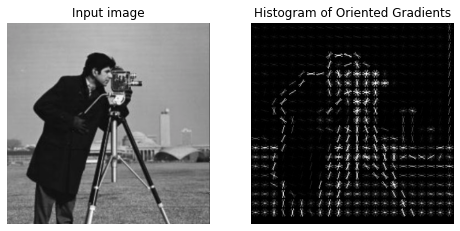

In [32]:
image = cv2.imread('man.png')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## IV. Scale-Invariant Feature Transform (SIFT)

Thư viện OpenCV cung cấp các hàm liên quan đến trích chọn đặc trưng SIFT.

https://docs.opencv.org/3.4/d5/d3c/classcv_1_1xfeatures2d_1_1SIFT.html

Để khởi tạo đối tượng SIFT trong OpenCV ta sử dụng lệnh: sift = cv2.xfeatures2d.SIFT_create(). 

Đối tượng này có phương thức detectAndCompute trả về 2 outputs kp và des, kp là một list chứa các keypoints được detect bởi SIFT, des là một numpy array chứa len(kp) vectors 128 chiều. 

Chúng ta sẽ dùng các des này để phục vụ bài toán phân loại.

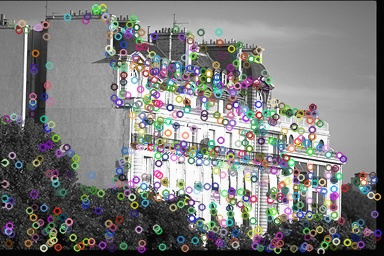

In [10]:
img = cv2.imread('ville01002.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()

kp, des = sift.detectAndCompute(gray,None)

img=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite('sift_keypoints.jpg',img)
Image('sift_keypoints.jpg')

## IV. Interest point detector
Speeded-Up Robust Features (SURF)

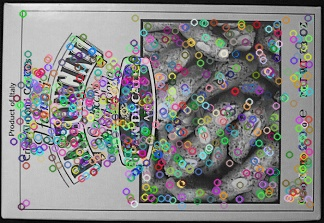

In [11]:
img = cv2.imread('box.png', 0)

minHessian = 400
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints = detector.detect(img)
#-- Draw keypoints
img_keypoints = np.empty((img.shape[0], img.shape[1], 3), dtype=np.uint8)
cv2.drawKeypoints(img, keypoints, img_keypoints)

cv2.imwrite('surf_keypoints.jpg',img_keypoints)
Image('surf_keypoints.jpg')

## V. Panorama Stitching

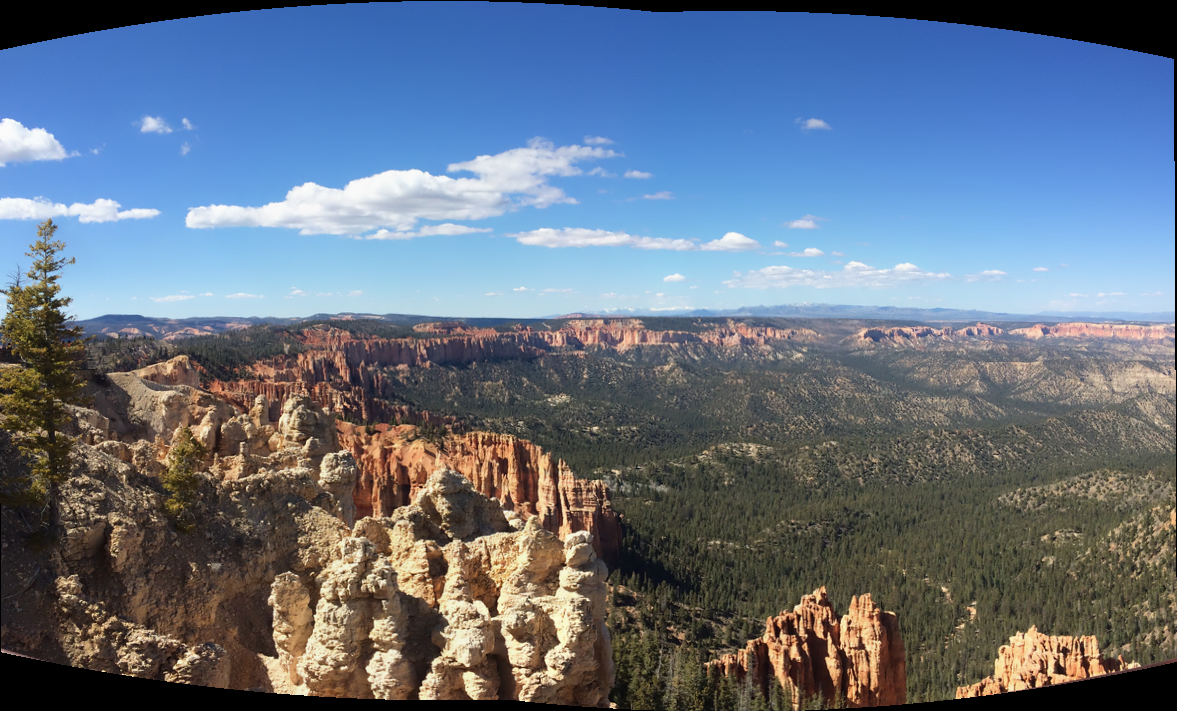

In [12]:
imageA = cv2.imread('./panorama/mountain1_left.png')
imageB = cv2.imread('./panorama/mountain1_right.png')

stitcher = cv2.createStitcher(False)
result = stitcher.stitch((imageA, imageB))
stitched=result[1]

cv2.imwrite('mountain1.png', result[1])
Image('mountain1.png')

# Xử lý phần viền

In [26]:
stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10,cv2.BORDER_CONSTANT, (0, 0, 0))
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh,cmap='gray')

In [27]:
# từ ảnh đen trắng, trích xuất đường viền, tính toán hộp giới hạn của đường viền lớn nhất 
# (tức là đường viền của chính bức tranh toàn cảnh) và vẽ hộp giới hạn
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)  #max đường viền
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(c)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
plt.imshow(mask,cmap='gray')

In [28]:
# tạo 2 bản sao của mặt nạ
# Mặt nạ thứ nhất sẽ được giảm kích thước từ từ sao cho vừa với phần bên trong của ảnh
# Mặt nạ thứ 2 sẽ xác định xem còn phải giảm mặt nạ thứ nhất không
minRect = mask.copy()
sub = mask.copy()
while cv2.countNonZero(sub) > 0:
    minRect = cv2.erode(minRect, None)
    sub = cv2.subtract(minRect, thresh)  # trừ cho nhau
plt.imshow(minRect,cmap='gray')

In [29]:
# Tìm đường viền trong  minRect
cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# Lấy đường viền lớn nhất
c = max(cnts, key=cv2.contourArea)  
# Tính bounding box của đường viền lớn nhất
(x, y, w, h) = cv2.boundingRect(c)
stitched = stitched[y:y + h, x:x + w]
cv2.imwrite('mountain1_stic.png', stitched)
Image('mountain1_stic.png')

In [1]:
imageA = cv2.imread('./panorama/scottsdale_left.png')
imageB = cv2.imread('./panorama/scottsdale_right.png')

stitcher = cv2.createStitcher(False)
result = stitcher.stitch((imageA, imageB))

cv2.imwrite('scottsdale.png', result[1])
Image('scottsdale.png')

Tạo ảnh panorama 

In [13]:
def detectAndDescribe(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect and extract features from the image
    descriptor = cv2.xfeatures2d.SIFT_create()
    (kps, features) = descriptor.detectAndCompute(image, None)

    # convert the keypoints from KeyPoint objects to NumPy arrays
    kps = np.float32([kp.pt for kp in kps])

    # return a tuple of keypoints and features
    return (kps, features)

In [14]:
def matchKeypoints(kpsA, kpsB, featuresA, featuresB, ratio, reprojThresh):
    # compute the raw matches and initialize the list of actual
    # matches
    matcher = cv2.DescriptorMatcher_create("BruteForce")
    rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
    matches = []

    # loop over the raw matches
    for m in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if len(m) == 2 and m[0].distance < m[1].distance * ratio:
            matches.append((m[0].trainIdx, m[0].queryIdx))

    # computing a homography requires at least 4 matches
    if len(matches) > 4:
        # construct the two sets of points
        ptsA = np.float32([kpsA[i] for (_, i) in matches])
        ptsB = np.float32([kpsB[i] for (i, _) in matches])

        # compute the homography between the two sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        # return the matches along with the homograpy matrix
        # and status of each matched point
        return (matches, H, status)

    # otherwise, no homograpy could be computed
    return None

In [15]:
def drawMatches(imageA, imageB, kpsA, kpsB, matches, status):
    # initialize the output visualization image
    (hA, wA) = imageA.shape[:2]
    (hB, wB) = imageB.shape[:2]
    vis = np.zeros((max(hA, hB), wA + wB, 3), dtype="uint8")
    vis[0:hA, 0:wA] = imageA
    vis[0:hB, wA:] = imageB

    # loop over the matches
    for ((trainIdx, queryIdx), s) in zip(matches, status):
        # only process the match if the keypoint was successfully
        # matched
        if s == 1:
            # draw the match
            ptA = (int(kpsA[queryIdx][0]), int(kpsA[queryIdx][1]))
            ptB = (int(kpsB[trainIdx][0]) + wA, int(kpsB[trainIdx][1]))
            cv2.line(vis, ptA, ptB, (0, 255, 0), 1)

    # return the visualization
    return vis

In [16]:
def stitch(images, ratio=0.75, reprojThresh=4.0, showMatches=False):
    #YOUR CODE HERE
    
    # Phát hiện keypoint và trích xuất đặc trưng từ 2 ảnh
    # Match features từ 2 ảnh
    # Áp dụng một đường cong để ghép các hình ảnh.
    # Dùng hàm cv2.warpPerspective
    
    #END CODE HERE
    if showMatches:
        vis = drawMatches(imageA, imageB, kpsA, kpsB, matches, status)
        return (result, vis)

    # return the stitched image
    return result

In [17]:
imageA = cv2.imread('./panorama/mountain1_left.png')
imageB = cv2.imread('./panorama/mountain1_right.png')

# stitch the images together to create a panorama
(result, vis) = stitch([imageA, imageB], showMatches=True)

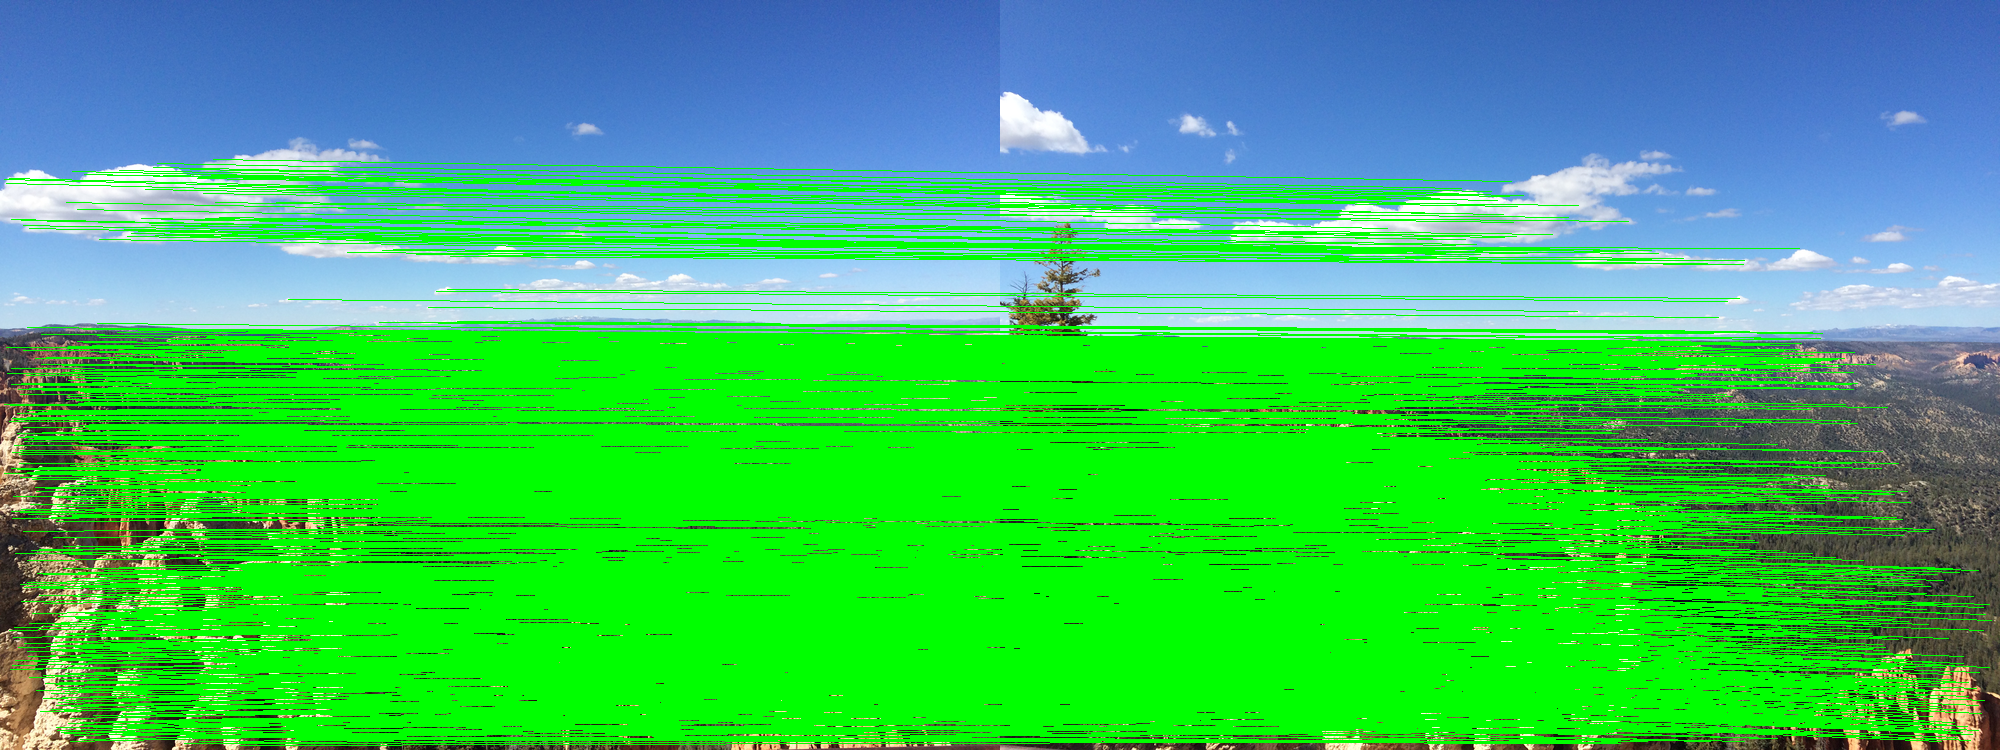

In [18]:
cv2.imwrite('matching.png', vis)
Image('matching.png')

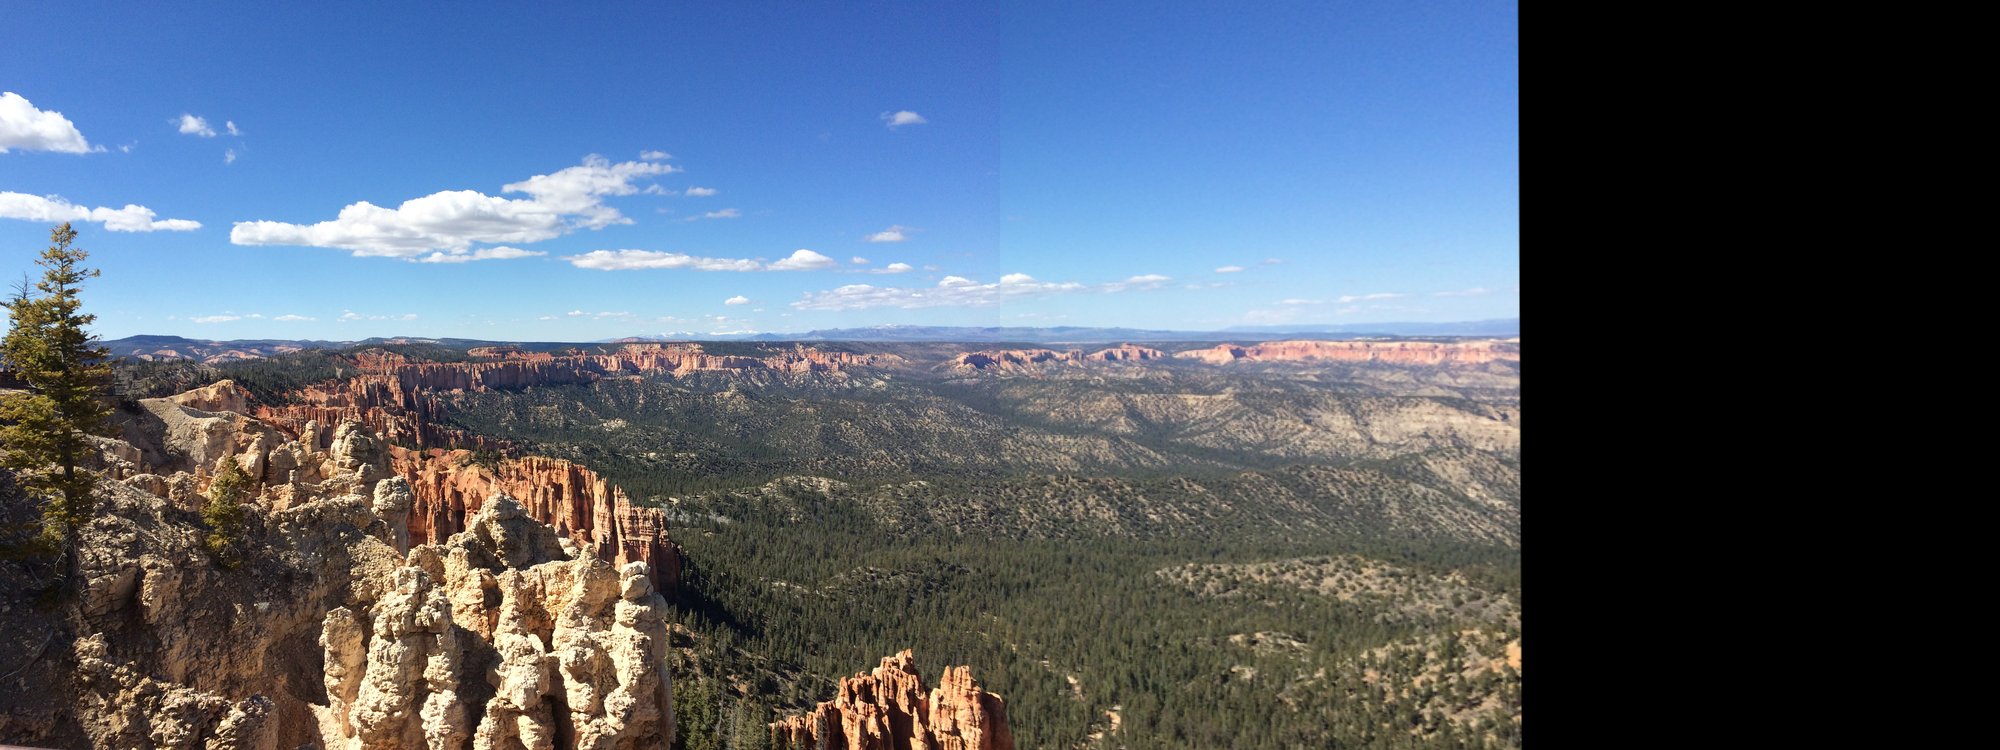

In [19]:
cv2.imwrite('result.png', result)
Image('result.png')

Xử lý phần viền tương tự như trên

In [2]:
## YOUR CODE HERE

## VI. Image Matching

In [13]:
img1 = cv2.imread('thaprua.jpg')
img2 = cv2.imread('thaprua2.jpg')
img3 = cv2.imread('chuamotcot.jpg')
img4 = cv2.imread('cotco.jpg')

In [13]:
img1_ = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_ = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_ = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_ = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.subplot(231), plt.imshow(img1_)
plt.subplot(234), plt.imshow(img2_)
plt.subplot(235), plt.imshow(img3_)
plt.subplot(236), plt.imshow(img4_)

In [15]:
sift = cv2.xfeatures2d.SIFT_create()

In [52]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3,None)
kp4, des4 = sift.detectAndCompute(img4,None)

- FLANN là viết tắt của Fast Library for Approximate Nearest Neighbors. Nó chứa một bộ sưu tập các thuật toán được tối ưu hóa để tìm kiếm hàng xóm gần nhất nhanh chóng trong bộ dữ liệu lớn
https://github.com/flann-lib/flann
http://opencv.jp/opencv-2svn_org/cpp/flann_fast_approximate_nearest_neighbor_search.html

In [76]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [77]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [78]:
matches2 = flann.knnMatch(des1,des2,k=2)

In [14]:
MIN_MATCH_COUNT=10
good = []
for m,n in matches2:
    if m.distance < 0.7*n.distance:
        good.append(m)

Sử dụng thuật toán RANSAC hoặc LEAST_MEDIAN từ hàm cv2.findHomography để chỉ định vùng object xác định

In [ ]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

In [ ]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3,),plt.show()

Hãy thực hành matching giữa các cặp ảnh khác với nhau

In [15]:
# YOUR CODE HERE